In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from scipy import stats

In [3]:
df = pd.read_csv("boston.csv")

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# Exploration Analysis

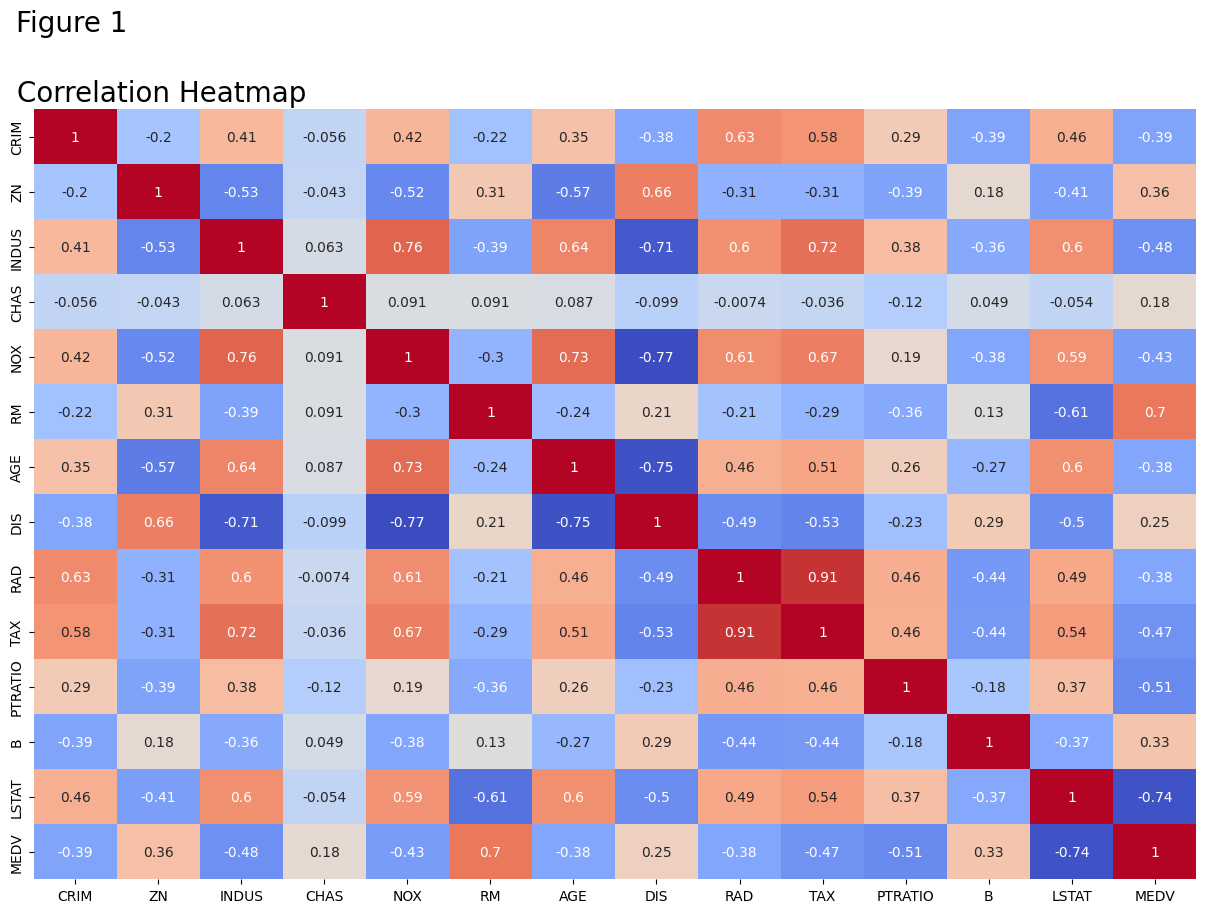

In [30]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, cbar=False, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap", x=0.11, fontsize=20)
plt.suptitle("Figure 1", x=0.15, va='top', fontsize=20)
plt.savefig("correlation_heatmap", bbox_inches='tight')

In [9]:
vif_df = pd.DataFrame()
vif_df["feature"] = df.columns
vif_df['vif_value'] = [vif(df.values, i) for i in range(df.shape[1])] 

In [10]:
vif_df.sort_values("vif_value", ascending=False)

,feature,vif_value
5,RM,136.101743
10,PTRATIO,87.227233
4,NOX,74.004269
9,TAX,61.939713
13,MEDV,24.503206
6,AGE,21.398863
11,B,21.351015
7,DIS,15.430455
8,RAD,15.369980
2,INDUS,14.485874


In [11]:
df["RAD"].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

Looking at both corr matrix and vif values, 10 out of 13 of the variables have high vif scores. It tells that regularization is needed for this linear regression model.

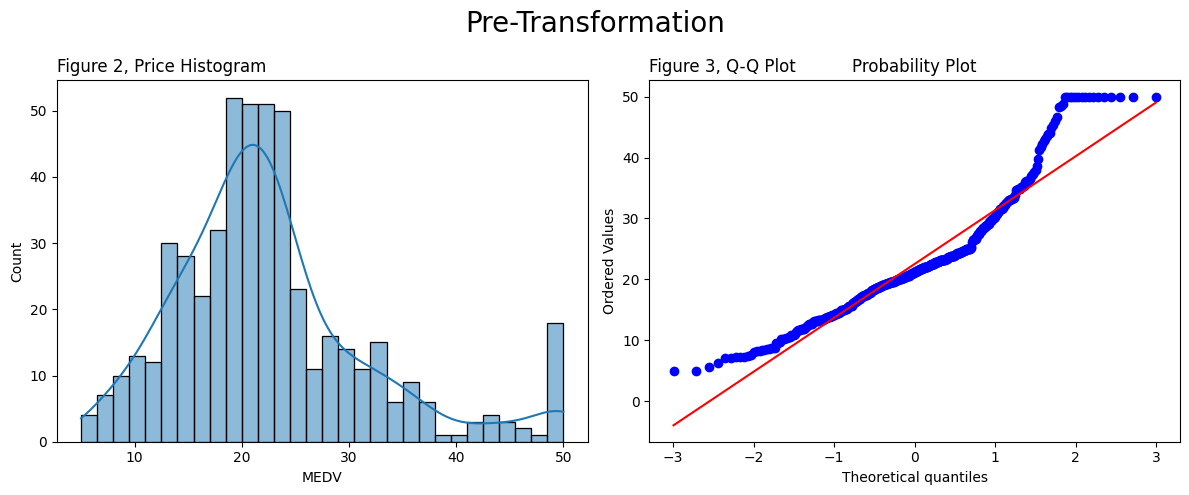

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df["MEDV"], bins=30, kde=True, ax=axs[0])
axs[0].set_title("Figure 2, Price Histogram", loc='left')

stats.probplot(df['MEDV'], dist="norm", plot=axs[1])
axs[1].set_title('Figure 3, Q-Q Plot', loc='left')

fig.suptitle("Pre-Transformation", fontsize=20)
plt.tight_layout()
plt.savefig("pre_transformation")
# plt.show()

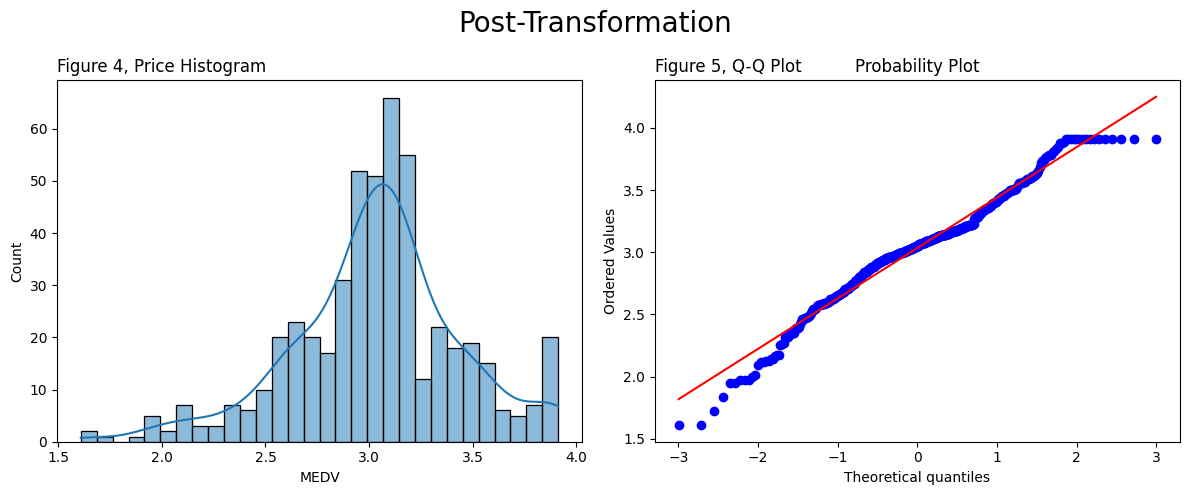

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(np.log(df["MEDV"]), bins=30, kde=True, ax=axs[0])
axs[0].set_title("Figure 4, Price Histogram", loc='left')
# plt.savefig("after_hist")
# plt.show()

stats.probplot(np.log(df['MEDV']), dist="norm", plot=axs[1])
axs[1].set_title('Figure 5, Q-Q Plot', loc='left')

fig.suptitle("Post-Transformation", fontsize=20)
plt.tight_layout()
plt.savefig("post_transformation")

# plt.savefig("after_qqplot")
# plt.show()

In [14]:
X = df.drop(columns=["MEDV"])
y = np.log(df["MEDV"]*1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [17]:
# Ridge model
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

print(f"Train MSE: {mean_squared_error(y_train, y_train_pred)}, Train R^2 Score: {r2_score(y_train, y_train_pred)}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}, Test R^2 Score: {r2_score(y_test, y_pred)}")

Train MSE: 0.034836736730648674, Train R^2 Score: 0.7937868748307647
Test MSE: 0.04023520896736746, Test R^2 Score: 0.7418897916286485


In [19]:
# Lasso model
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
y_train_pred_lasso = lasso.predict(X_train)

print(f"Train MSE: {mean_squared_error(y_train, y_train_pred_lasso)}, Train R^2 Score: {r2_score(y_train, y_train_pred_lasso)}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_lasso)}, Test R^2 Score: {r2_score(y_test, y_pred_lasso)}")

Train MSE: 0.0812167420951035, Train R^2 Score: 0.5192443444692522
Test MSE: 0.07513601187574658, Test R^2 Score: 0.5179999761609249


In [20]:
# Linear model
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred_linear = linear.predict(X_test)
y_train_pred_linear = linear.predict(X_train)

print(f"Train MSE: {mean_squared_error(y_train, y_train_pred_linear)}, Train R^2 Score: {r2_score(y_train, y_train_pred_linear)}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_linear)}, Test R^2 Score: {r2_score(y_test,y_pred_linear)}")

Train MSE: 0.03451102073877312, Train R^2 Score: 0.7957149231758659
Test MSE: 0.03955201596532062, Test R^2 Score: 0.7462724975382706


In [24]:
ridge.coef_

array([-9.51340882e-03,  8.45140189e-04,  1.67295510e-03,  8.68831460e-02,
       -4.03206762e-01,  1.14867484e-01, -3.93520467e-04, -4.43091770e-02,
        1.05383429e-02, -5.39066557e-04, -3.32707583e-02,  5.91960725e-04,
       -2.89151255e-02])

In [26]:
np.log(df["MEDV"].describe())

count    6.226537
mean     3.114972
std      2.218889
min      1.609438
25%      2.834683
50%      3.054001
75%      3.218876
max      3.912023
Name: MEDV, dtype: float64

In [27]:
df["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

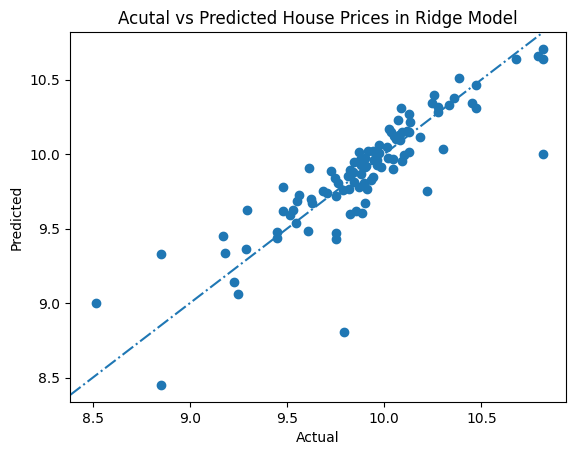

In [38]:
plt.scatter(y_test, y_pred)
plt.axline((8.5, 8.5) ,slope=1, linestyle = '-.')
plt.title("Acutal vs Predicted House Prices in Ridge Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.savefig("Actual_Predicted")
plt.show()

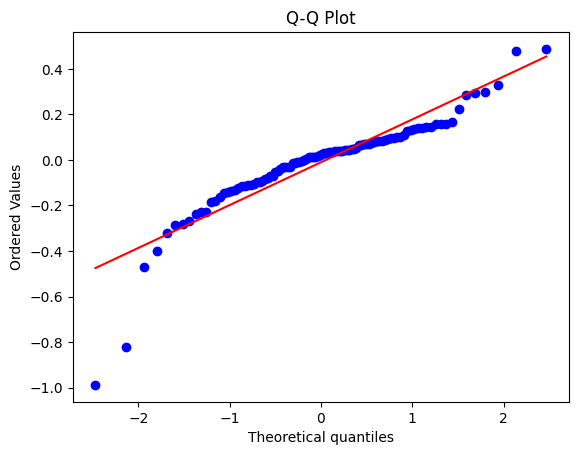

In [44]:
residuals = (y_pred - y_test)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.savefig("residuals")
plt.show()